# **Showcase Notebook**

## **I. Introduction**

The agricultural sector is facing increasing pressure to transition towards more sustainable and environmentally friendly practices. With global population growth, the demand for food is rapidly increasing, and the agricultural industry is expected to meet this demand while reducing its environmental impact. The United Nations has set out an ambitious goal of achieving sustainable agriculture by 2030, which requires a significant shift towards more sustainable and climate-friendly agricultural practices ([United Nations, 2023](https://www.un.org/sustainabledevelopment/hunger/)).

Data science can play a crucial role in driving this transition by providing insights and solutions to address the challenges faced by the agricultural sector. The use of data science in agriculture can help improve the efficiency of farming practices, reduce waste and pollution, and mitigate the impact of climate change on crops and livestock. Additionally, data science can help to optimize the use of resources, such as water and fertilizers, and enable farmers to make more informed decisions.

In the project Agros, we will explore the application of data science techniques to improve the sustainability of agriculture. The project was conceived as part of a two-day hackathon where a team of data-driven students was tasked with studying the agricultural production of several countries. The objective of the project is to contribute to the green transition by developing a Python class that can analyze and present data in a manner that is easy to understand and use.

The project begins with an overall analysis using the Gapminder plot for the most recent year and the year 1980. The team identified the most important variables and noted the biggest changes that had occurred over time. They then chose three countries, including one EU member and one non-EU country, and used all other analytical methods they had developed to analyze the evolution of each country's agricultural data.

The results of the analysis are presented in this showcase notebook, which includes a brief story about the evolution of each country's agricultural data. The notebook also features a choropleth for the most recent year and the year 2000 and an analysis of the results of the predictor.

The project is designed to promote sustainable agriculture by providing farmers, policymakers, and other stakeholders with valuable insights into the agricultural sector. The team behind the project is composed of students from the Master's in Business Analytics at Nova School of Business and Economics who are passionate about making a positive impact in the world. They have included their names, student numbers, and email addresses in the README.md file and are committed to continually updating and improving the Agros Project.

<div style="border-top: 3px solid black;"></div>

## **II. Dataset**



##### **Initial Imports**

In [1]:
import sys
import pandas as pd
sys.path.append(sys.path[0] + "/class")
from agros import Agros

In [2]:
FILE_URL = (
    "https://github.com/owid/owid-datasets/blob/"
    "693acdec5821af0a1b73523905d2a6ccefd6d509/datasets/"
    "Agricultural%20total%20factor%20productivity%20(USDA)/"
    "Agricultural%20total%20factor%20productivity%20(USDA).csv?raw=true"
)

agros = Agros(FILE_URL)
data, geo_data = agros.import_file()

<hr style="border-top: 1px dashed #8c8b8b;">

#### **A. Description of the dataset used in the analysis**

The dataset used in the Agros project contains agricultural production data for several countries and is provided by the U.S. Department of Agriculture (USDA) Economic Research Service. It covers a period from 1961 to 2019 and includes various variables such as agricultural TFP, total output, inputs, land use, and livestock production. The data was preprocessed to remove missing values and ensure consistency across the variables.

The dataset contains annual indices of agricultural TFP for countries and regions of the world. TFP measures the efficiency of agricultural production, taking into account the amount of inputs used to produce a given level of output. More detailed information on the dataset and TFP can be found [here](https://www.ers.usda.gov/data-products/international-agricultural-productivity/).

Below is a list of the variables included in the dataset, along with their descriptions and units of measurement:

In [3]:
variables = {'Variable Name': ['Entity', 'Year', 'TFP', 'Output', 'inputs',

variables = {'Variable Name': ['Entity', 'Year', 'TFP', 'Output', 'inputs',
                               'ag_land_index', 'labor_index', 'capital_index',
                               'materials_index', 'output_quantity',
                               'crop_output_quantity', 'animal_output_quantity',
                               'fish_output_quantity', 'ag_land_quantity',
                               'labor_quantity', 'capital_quantity',
                               'machinery_quantity', 'livestock_quantity',
                               'fertilizer_quantity', 'animal_feed_quantity',
                               'cropland_quantity', 'pasture_quantity',
                               'irrigation_quantity'],
             'Description': ['Country/Territory name', 'Year', 'agricultural TFP',
                             'total agricultural output', 'total agricultural input',
                             'Index of total agricultural land input',
                             'Index of total agricultural labor input',
                             'Index of total agricultural capital input',
                             'Index of total agricultural materials input',
                             'Quantity of total agricultural output',
                             'Quantity of total crop output',
                             'Quantity of total animal output',
                             'Quantity of total aquaculture output',
                             'Quantity of total agricultural land',
                             'Quantity of total agricultural labor',
                             'Quantity of total agricultural capital stock',
                             'Quantity of total agricultural machinery stock',
                             'Quantity of total agricultural animal inventories',
                             'Quantity of total agricultural fertilizer',
                             'Quantity of total agricultural feed',
                             'Quantity of total cropland',
                             'Quantity of total permanent pasture',
                             'Quantity of total area equipped for irrigation'],
             'Unit': ['', '', '', '', '', 'Index', 'Index', 'Index', 'Index', '$1000',
                      '$1000', '$1000', '$1000', '1000 hectares, rainfed-cropland-equivalents',
                      '1000 persons economically active in agriculture', '$million',
                      '1000 metric horsepower (CV)', '1000 head of standard livestock units',
                      'Metric tons of inorganic N,P,K and organic N',
                      '106 Mcal of metabolizable energy', '1000 hectares', '1000 hectares',
                      '1000 hectares']
            }

variables_df = pd.DataFrame(variables)

display(variables_df)

,Variable Name,Description,Unit
0,Entity,Country/Territory name,
1,Year,Year,
2,TFP,agricultural TFP,
3,Output,total agricultural output,
4,inputs,total agricultural input,
5,ag_land_index,Index of total agricultural land input,Index
6,labor_index,Index of total agricultural labor input,Index
7,capital_index,Index of total agricultural capital input,Index
8,materials_index,Index of total agricultural materials input,Index
9,output_quantity,Quantity of total agricultural output,$1000


<hr style="border-top: 1px dashed #8c8b8b;">

#### **B. List of available countries in the dataset**

In [4]:
print("There are in total", len(agros.country_list()), "available countries in the dataset.")

There are in total 179 available countries in the dataset.


In [5]:
# Print the list of countries
print("The following is a list of all available countries in the dataset:\n")
for country in agros.country_list():
    print("- " + country)

The following is a list of all available countries in the dataset:

- Afghanistan
- Albania
- Algeria
- Angola
- Argentina
- Armenia
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahrain
- Bangladesh
- Belarus
- Belgium
- Belize
- Benin
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- Brunei
- Bulgaria
- Burkina Faso
- Burundi
- Cambodia
- Cameroon
- Canada
- Cape Verde
- Chad
- Chile
- China
- Colombia
- Comoros
- Congo
- Costa Rica
- Croatia
- Cuba
- Cyprus
- Czechia
- Czechoslovakia
- Democratic Republic of Congo
- Denmark
- Djibouti
- Dominican Republic
- Ecuador
- Egypt
- El Salvador
- Equatorial Guinea
- Eritrea
- Estonia
- Eswatini
- Ethiopia
- Fiji
- Finland
- France
- French Guiana
- Gabon
- Gambia
- Georgia
- Germany
- Ghana
- Greece
- Guatemala
- Guinea
- Guinea-Bissau
- Guyana
- Haiti
- Honduras
- Hungary
- Iceland
- India
- Indonesia
- Iran
- Iraq
- Ireland
- Israel
- Italy
- Jamaica
- Japan
- Jordan
- Kazakhstan
- Kenya
- Kuwait
- Kyrgyzstan
- Laos
- Lat

<div style="border-top: 3px solid black;"></div>

## **III. Analysis**

### **A. Gapminder Analysis**

#### 1. Introduction to Gapminder and its use in analyzing agricultural data

Gapminder, a data visualization tool developed by Hans Rosling, Ola Rosling, and Anna Rosling Rönnlund, offers an innovative approach to analyzing data on a global scale. Its interactive graphs, available on the [Gapminder website](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1), allow users to explore complex relationships and gain insights into diverse issues, including agriculture. In this project, we have developed a Gapminder imitation using the Python data visualization library, matplotlib.pyplot, to examine the relationship between fertilizer and irrigation quantity on agricultural output across all countries in 1980 and 2019.

Our visualization employs a scatter plot where each country is represented as a single data point. The x-axis measures the amount of fertilizer applied in units of metric tons of inorganic N,P,K and organic N, while the y-axis measures the total agricultural production in thousands of dollars. The diameter of each point represents the irrigation quantity in the country in units of 1,000 hectares. To better understand global agricultural production and output, we start our analysis with a brief overview of global production using our custom Gapminder method.

Our choice to include irrigation as an additional factor in our analysis reflects our objective to explore a detailed global picture with many facets. Irrigation is a well-known factor in natural resource management in global agriculture, and our preliminary analysis indicated an acceptable correlation between irrigation and total production. By examining the impact of agricultural inputs on production, our visualization can provide insights that inform decision-making in the agricultural sector.

#### 2. Overall analysis using the Gapminder plot for the most recent year and 1980

The scatter plot created with our Gapminder method, which shows the impact of fertiliser and irrigation volume on production in 2019, provides interesting insights into agricultural practices in various countries. Most countries are in the small point category, with irrigation volumes of around 1,900 ha, indicating low levels of irrigation, fertilizer, and production. However, one country in this category stands out with a higher production volume, indicating that it may be using more efficient farming methods.

A medium point with an irrigation output of 36,200 ha (between 20 and 30 million tonnes of fertiliser output quantity and between 0.2 and 0.4 trillion dollars output quantity) indicates that this country may be using more advanced irrigation techniques to increase output. Similarly, a large dot with an irrigation volume of 70,400 ha (between 30 and 40 million tonnes of fertiliser quantity and 0.4 to 0.6 trillion dollar output quantity) indicates that this country uses a high level of irrigation and possibly other agricultural techniques to achieve a high level of production. Furthermore, one country with more than 50 million tonnes of fertiliser and more than one trillion dollars in output falls into the 'large' category (70,400 ha irrigation quantity), indicating that this country employs a high level of fertiliser, irrigation, and other agricultural techniques to achieve a very high yield. 

A closer examination of the scatter plot with a standard scale indicates a positive correlation between fertiliser quantity and production quantity, and irrigation and production quantity. This finding suggests that at the global level, higher total output is associated with higher fertiliser and irrigation water use. However, as the values are not adjusted for the respective industry size of the countries, larger agro-industries automatically consume larger amounts of fertilisers and irrigation water. Therefore, a regression analysis and subsequent tests of the linear relationship between the variables are necessary for further research.

Our analysis shows that four countries, namely China, India, the United States, and Brazil, dominate global agricultural production, producing many times the output of other countries. However, for smaller players, a logscale parameter has been added to our Gapminder method, revealing two interesting factors. First, the true scale of production of the largest actors compared to the smallest actors becomes apparent. Second, the lower a country's total fertiliser consumption, the greater the variability in output. This observation suggests that for countries with lower total production, factors other than fertiliser use limit production capacity, whereas, for countries with immense agricultural output, factors such as arable land and rainfall must be present to scale with fertiliser use. Further analysis and research are needed to better understand the complexities of agricultural production across countries.

In [6]:
most_recent_year = data["Year"].max()
most_recent_year

2019

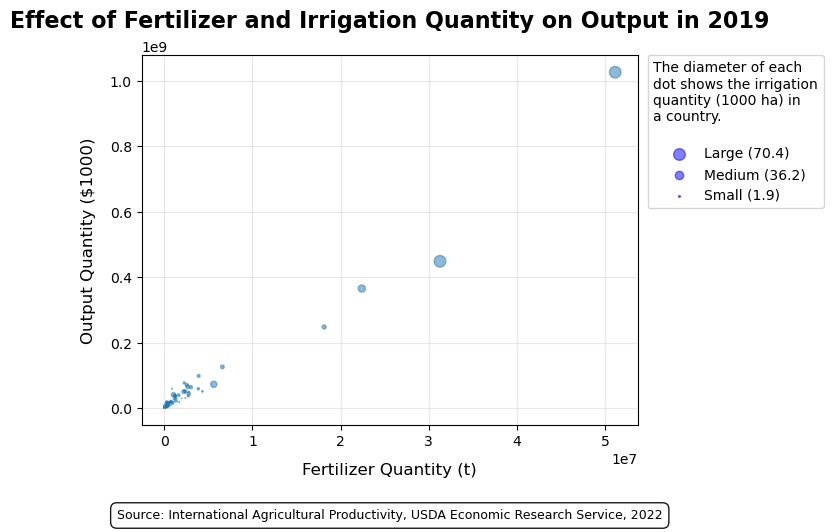

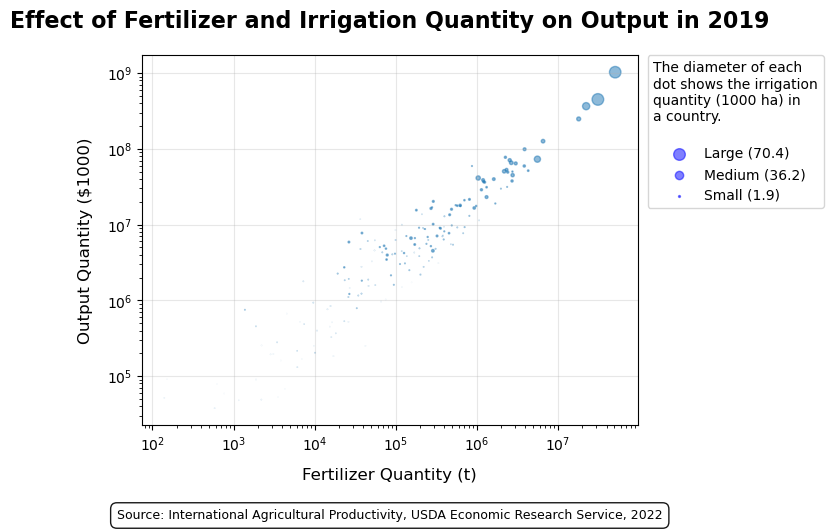

In [7]:
agros.gapminder(year = 2019,logscale = False)
agros.gapminder(year = 2019,logscale = True)

Upon examining the scatter plot depicting the relationship between fertiliser and irrigation levels and production in 1980, it is evident that both differences and similarities exist when compared to the similar graph from 2019.

As with the previous graph, there are four countries in this graph from 1980 that differ significantly from the rest. However, it is important to note that in 1980, significantly fewer quantities of fertiliser and irrigation were used, resulting in substantially lower output levels. Despite this, two countries stand out with notably higher output volumes, suggesting that they may have implemented more efficient farming methods.

The majority of countries fall into the small point category, with irrigation levels hovering around 1,300 ha (approximately 600 ha less than in 2019). This indicates that these countries had lower levels of irrigation, fertiliser use, and consequently, production. On average, these countries use up to 6 million tonnes of fertiliser and generate approximately 60 billion dollars worth of output.

There is also a small to medium point with an irrigation output of around 10,000 ha (using between 10 and 15 million tonnes of fertiliser and generating between 60 and 100 billion dollars), suggesting that this country may have adopted more advanced irrigation techniques to enhance production.

In addition, there are two large points on the scatter plot that used an irrigation amount of about 44,900 ha in 1980. The first country used only about 6 million tonnes of fertiliser and achieved around 130 billion dollars in output. The second country employed approximately 18 million tonnes of fertiliser and obtained about 205 billion dollars in output. Notably, a dominant country that utilised only around 23,100 ha of irrigation stands out, having utilised about 24 million tonnes of fertiliser and achieved a substantial output worth approximately 225 billion dollars.

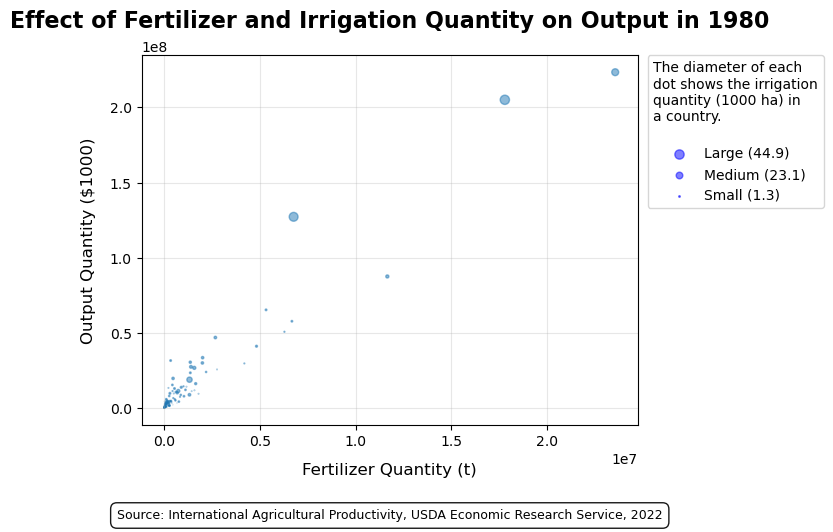

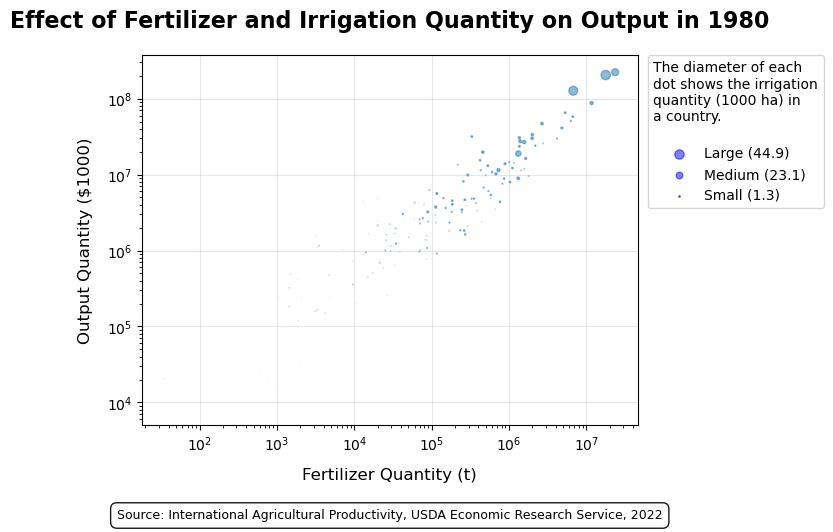

In [8]:
agros.gapminder(year = 1980,logscale = False)
agros.gapminder(year = 1980,logscale = True)

Examining the scatter plots of agricultural production in 1980 and 2019 reveals some interesting trends and changes in agricultural practices over the years. The 2019 scatter plot shows that countries with higher fertiliser and irrigation volume tend to have higher levels of production. However, this correlation is not adjusted for the respective size of the agro-industries, suggesting the need for further research to better understand the complexities of agricultural production across countries. In contrast, the 1980 scatter plot indicates that despite lower levels of fertiliser and irrigation use, some countries were still able to achieve high levels of production, potentially indicating the implementation of efficient farming methods. Overall, the analysis highlights the dominance of four countries (China, India, the United States, and Brazil) in global agricultural production and suggests the need for further research to understand the factors that influence agricultural output across different countries.

<hr style="border-top: 1px dashed #8c8b8b;">

### **B. Comparison of Three Countries (area chart, total output chart)**

#### 1. Introduction to the three selected countries

In the second part of our analysis, we have chosen three countries to examine in more detail, with the aim of understanding the differences in their agricultural industries and how they have evolved over time. To ensure a diverse set of cases, we have selected at least one EU country and one non-EU country, as well as three of the four largest economies in the world in terms of agricultural output distribution. Specifically, we have chosen to analyse:

- **China** (Asia)
- **United States of America** (North America)
- **Germany** (Europe)

The choice of these countries is particularly interesting for several reasons. First, China and the United States are both major players in the global agricultural market, with China being the largest producer of agricultural products in the world and the United States being the largest exporter. By comparing their agricultural practices and policies, we can gain valuable insights into the different approaches taken by countries with varying levels of development and political systems.

Second, Germany is a notable case as a highly developed EU country with a long history of agricultural production. By examining its agricultural practices alongside those of China and the United States, we can better understand the similarities and differences between developed and developing agricultural systems.

#### 2. Analysis of the agricultural production across area charts for each country

After analyzing the agricultural output of the three selected countries, namely China, the United States of America, and Germany, it is clear that the output trends for each country vary significantly. The agricultural output for each country is split into animal output, crop output, and fish output.

China's agricultural output remained stable from 1960 to 1970 and only experienced a slight increase. However, from the mid-1970s, China's agricultural output exploded and increased exponentially. Since the 1990s, China has also been producing more and more fish output, while crop output still remains dominant. In 2019, the fish output was almost as much as the animal output. In 1960, China's total output was about 100 billion dollars, but in 2019, they have an output of around 1 trillion dollars. One potential explanation for China's exponential increase in agricultural output could be attributed to the country's investment in agricultural technology and infrastructure. In addition, China has increased its focus on aquaculture and fish farming, leading to an increase in fish output.

In contrast, the output of the United States steadily increased from 1960 until 2019, with some minor fluctuations in between. There were two major declines, one in the 1980s, and another in the 1990s, especially with regards to the crop output. The animal output, on the other hand, seems to be steadily growing. In 1960, the United States had a total output of about 150 billion dollars, but in 2019, they had an output of around 400 billion dollars. The significant decline in the United States of America's crop output in the 1990s may be related to policy changes and global economic factors, while the stable growth in animal output may be attributed to the high demand for meat and dairy products. 

Germany's agricultural output first steadily increased from 1960 to 1985, with some minor fluctuations. However, Germany is mainly relying on animal and crop output. In the 1990s, there was a major decline, especially in animal output, which could be due to the reunification of East and West Germany. From 1995 onwards, animal output remained stable with only very small increases. Output of crops is increasing a little faster but still has some fluctuations. In 1960, the total output of Germany was around 40 million dollars, but in 2019, it was around 50 million dollars. Finally, Germany's decline in agricultural output during the reunification period may be due to the restructuring of the agricultural sector and the integration of East and West Germany's agricultural industries.

In summary, our analysis has shown that the agricultural industries of China, the United States, and Germany have developed differently over time. These differences in agricultural production can be attributed to various factors such as government policies, investments in research and development, climate, and cultural factors. For example, China's government has invested heavily in its agricultural sector and implemented policies to encourage farmers to increase their productivity. In contrast, Germany's agricultural industry has faced challenges due to policy changes, such as the phasing out of subsidies, and the unification of East and West Germany in the 1990s.

Comparing the three countries, we can see that China has experienced the most significant increase in agricultural output, while the United States has shown steady growth with some fluctuations, and Germany has had a more modest increase with a significant decline in the 1990s. Furthermore, China relies on fish output, while Germany and the United States rely more on animal and crop output. These differences demonstrate the importance of examining the agricultural industries of various countries to understand their unique challenges and opportunities.

In conclusion, our analysis has shown that the agricultural industries of China, the United States, and Germany have developed differently over time, and this can be attributed to various factors. Understanding these differences is crucial for policymakers, researchers, and farmers to identify potential opportunities and challenges in the agricultural sector.

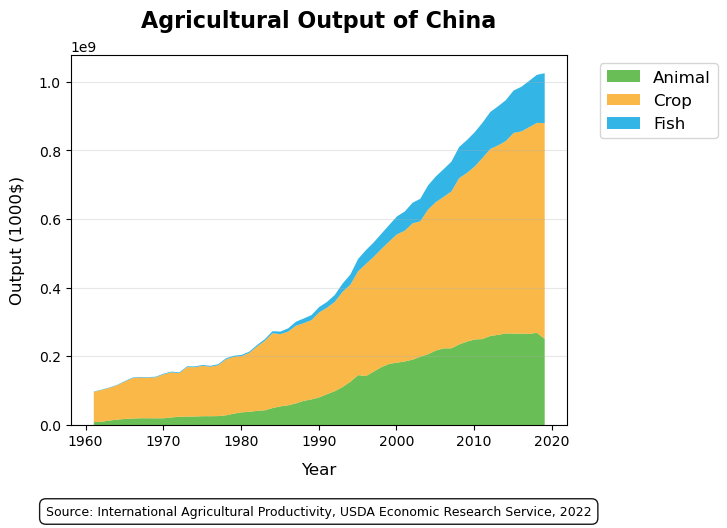

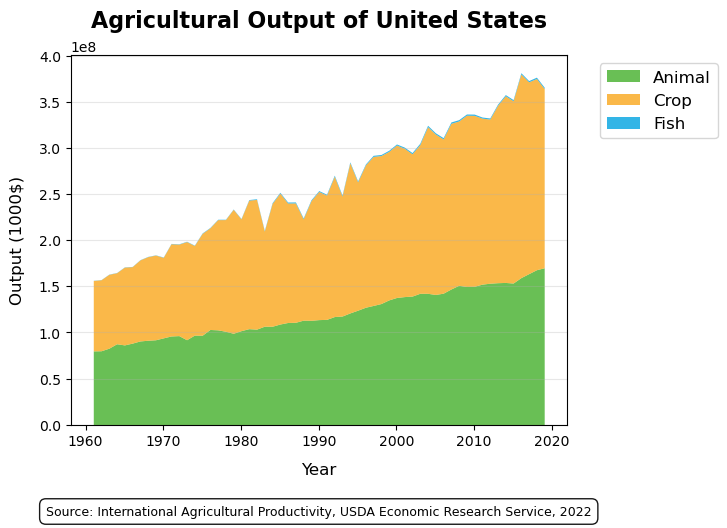

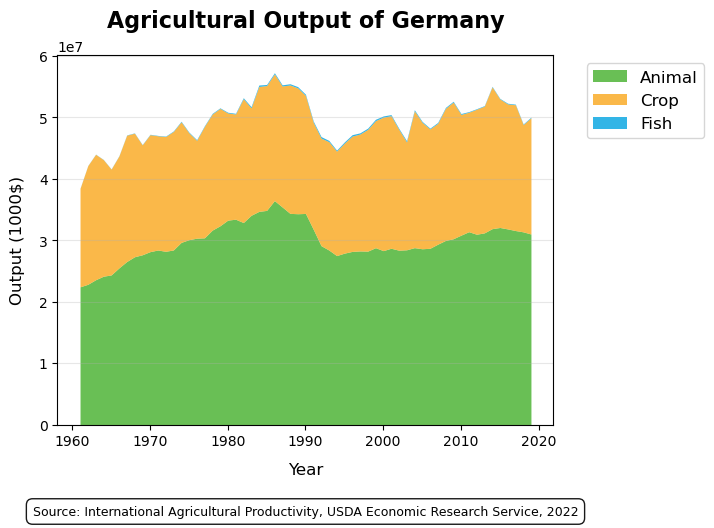

In [9]:
# Composition of output of individual countries
agros.area_chart(country = ["China", "United States", "Germany"], normalize = False)

#### 3. Analysis of the total output chart for each country

Looking at the total output charts for China, the USA and Germany, some interesting observations can be made. From 1960 to 1980, the total output of China and the USA was almost the same, at around 100 billion dollars. However, from the mid-1970s, China's output began to increase exponentially, and by 2019, it had reached around 1 trillion dollars. In contrast, the output of the USA steadily increased from 1960 to 2019, with some minor fluctuations in between. In 1960, the USA had a total output of around 150 billion dollars, and by 2019, it had increased to around 400 billion dollars.

Germany, on the other hand, had a significantly smaller total output compared to the other two countries. From 1960 to 2019, the total output of Germany increased from around 40 billion dollars to around 50 billion dollars, with some major fluctuations in between.

In 1960, the total output of China and the USA combined accounted for around 0.3 trillion dollars. By 2019, however, their combined output had increased to around 1.4 trillion dollars. It would be interesting to know the share that these three countries have from the global total output, as this would provide further insight into the global agricultural industry and the role these countries play within it. 

In conclusion, it is worth noting that there are several factors that may have contributed to the differences in output between these countries, such as differences in government policies, natural resources, technology, and infrastructure. However, the data suggests that China's rapid economic growth and development over the past few decades have played a significant role in its dominance in terms of total output.

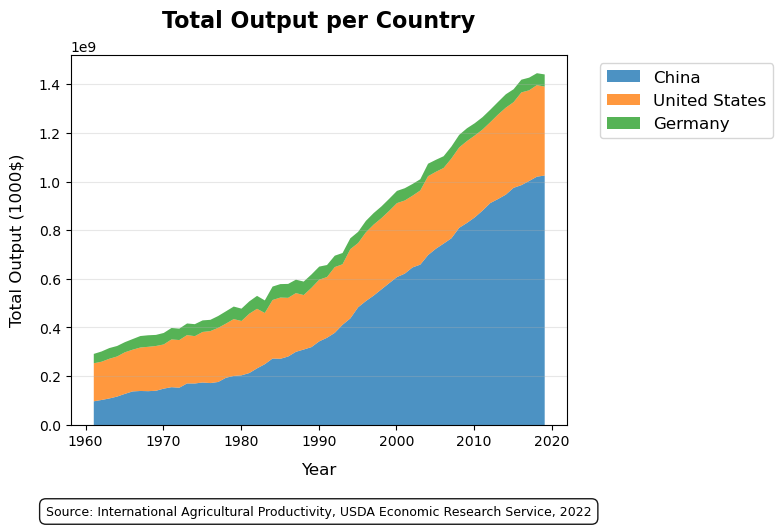

In [10]:
# Total output layer chart
agros.total_output(countries = ["China", "United States", "Germany"])

<hr style="border-top: 1px dashed #8c8b8b;">

### **C. Correlation Analysis**

#### 1. Introduction to correlation analysis and its importance in understanding the relationships between variables

Our analysis has provided insights into the distinct characteristics of countries' agricultural industries. However, we also want to identify commonalities that exist across different countries. In order to uncover such similarities, we will conduct a correlation analysis of input and output factors.

Correlation analysis is a fundamental statistical technique used to measure the degree of association between two or more variables. In the context of agriculture, it can help to identify which factors have the greatest impact on agricultural productivity, and how these factors are interrelated. Understanding the relationships between variables is crucial in identifying opportunities to improve sustainability and reduce environmental impact. Correlation analysis can also help to identify trends and patterns over time, and to predict future outcomes based on historical data. To perform this analysis, we used the corr_quantity method, which generates a correlation matrix between the variables.

#### 2. Correlation analysis for all numerical variables in the dataset

Upon examining the correlation matrix, we notice a pattern where most variables exhibit strong positive correlations. It is worth noting that the weaker correlations are mostly related to fish output quantity. This can be attributed to the fact that fish production requires access to water bodies, which may not be available in all countries, unlike livestock and crop production that require land and other resources that may be scarce in certain regions.

We can observe that livestock and crop production have strong positive correlations with the input variables and with each other. This suggests that the production of agricultural outputs in terms of livestock and crops requires a similar mixture of inputs worldwide, which are not easily substitutable. Consequently, countries that produce the most crops and livestock are likely to have the most outstanding and affordable access to all required resources. This implies that for a country to become a leading producer of agricultural output other than fish, it will need good access to extensive farmland, affordable labor, decent capital, access to irrigation water, machinery, etc.

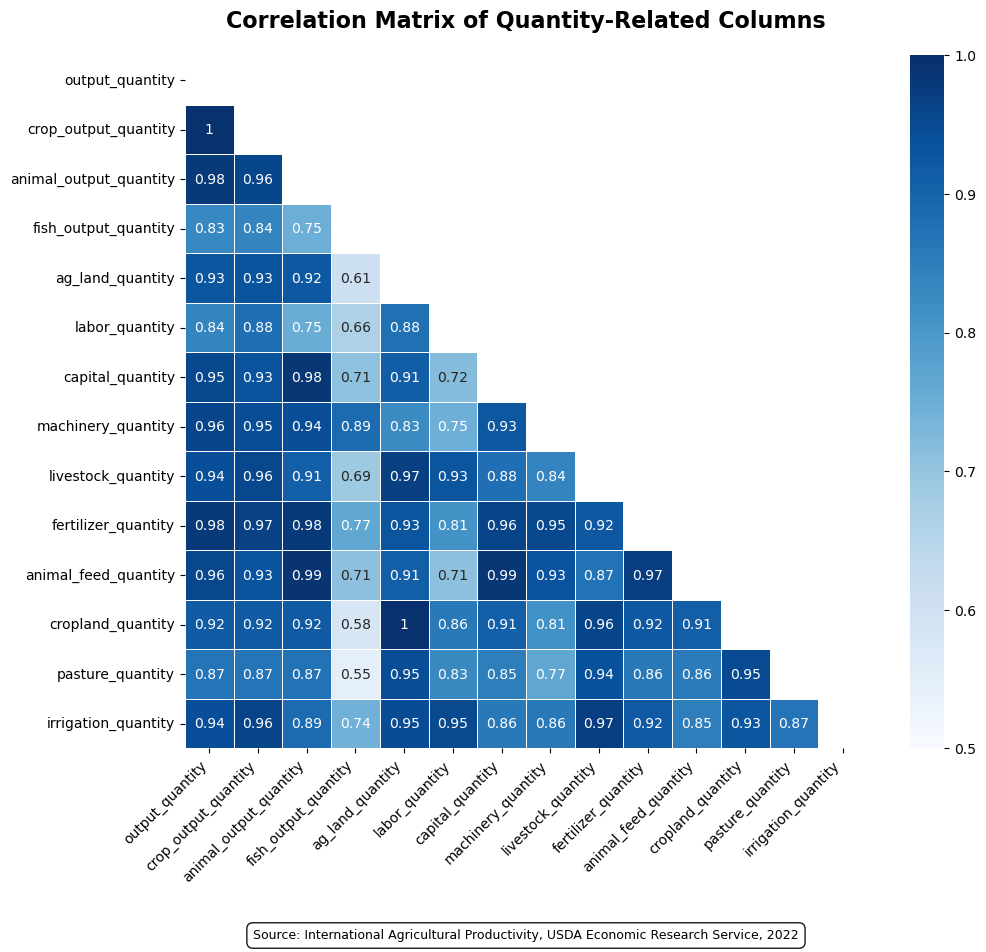

In [11]:
agros.corr_quantity()

#### 3. Interpretation of the results and identification of key insights

The strong positive correlations among the input variables and between the input variables and output variables indicate that the production of agricultural outputs requires a similar combination of inputs globally, except for fish production. This implies that countries with greater access to these resources are likely to be major agricultural producers.

Furthermore, the weaker correlation between fish output and livestock and crop production can be attributed to differences in resource availability. As mentioned, fish production requires access to water bodies, which may not be available in all countries, while livestock and agricultural production require land and other resources that may be scarce in certain regions. This can result in different patterns of production across countries, which can weaken the correlation between fish output and livestock and agricultural output.

<hr style="border-top: 1px dashed #8c8b8b;">

### **D. Choropleth Analysis**

#### 1. Introduction to choropleth analysis and its use in visualizing geographical data

Choropleth analysis is a popular technique for visualizing geographical data, including agricultural data. It involves mapping a range of data values to a color scale and then coloring geographic regions, such as countries or states, based on the values of the data. This allows for easy identification of regions with high or low values, as well as patterns and trends in the data across different regions.

In the context of the Agros project, choropleth analysis can be used to visualize various agricultural indicators such as total factor productivity across different countries or regions. By plotting these indicators on a map, it becomes easier to identify which regions are performing well or poorly in terms of agriculture, which can help to guide decision-making and policy development.

Choropleth maps can be created using a variety of software tools, including Python libraries like geopandas, folium, and plotly. These tools allow for the creation of interactive and dynamic maps that can be customized to suit specific needs and objectives.

Overall, choropleth analysis is a powerful technique for visualizing geographical data in the context of agriculture, and can be used to gain insights and inform decision-making for the Agros project.

#### 2. Analysis of the choropleth map for the most recent year and 2000

The choropleth maps depict the total factor productivity (TFP) of various countries in 2019 and 2000. The total factor productivity (TFP) is a measure of productive efficiency that indicates how much output can be produced from a given set of inputs such as labor and capital. It is calculated as the aggregate output to aggregate inputs ratio and accounts for the portion of output growth that cannot be explained by growth in traditionally measured inputs. Along with labor inputs, human capital, and physical capital, TFP is frequently regarded as the primary contributor to GDP growth rate. The x-axis and y-axis of the maps represent longitude and latitude, respectively. Countries are color-coded according to their level of TFP, with the 2019 map ranging from approximately 70 TFP to 170 TFP, and the 2000 map ranging from about 45 TFP to 255 TFP.

The color scales for the 2019 and 2000 maps are different, with the former ranging from dark blue to yellow and the latter ranging from dark blue to yellow as well, but with higher upper and lower bounds. In the 2019 map, most countries are colored light blue and green-blue, with Asian countries having lighter shades of blue, green, and green-yellow. Countries in the global south are colored with darker shades. Notable exceptions include Iceland, which is the only country being colored yellow, as well as Saudi Arabia and Tajikistan, which are colored light green. Australia is colored dark blue.

In contrast, the 2000 map shows almost all countries colored in navy blue to dark blue, with some exceptions of lighter blue-green coloration in southern African countries such as Botswana, Zimbabwe, and Mozambique. Occasionally, light blue-green coloration is also seen in countries in the north of Africa such as Libya and in the Middle East like Iraq and the United Arab Emirates. North America, Europe, and Australia are primarily colored navy blue. Some countries that stand out in darker blue shades include Norway, Brazil, Kazakhstan, and Niger.

Comparing the two maps, the 2019 map shows increasing levels of tfp in several countries, particularly in Asia. The maps offer important insights into the distribution of total factor productivity across different countries and regions and visualize the differences and changes in tfp levels between 2019 and 2000.

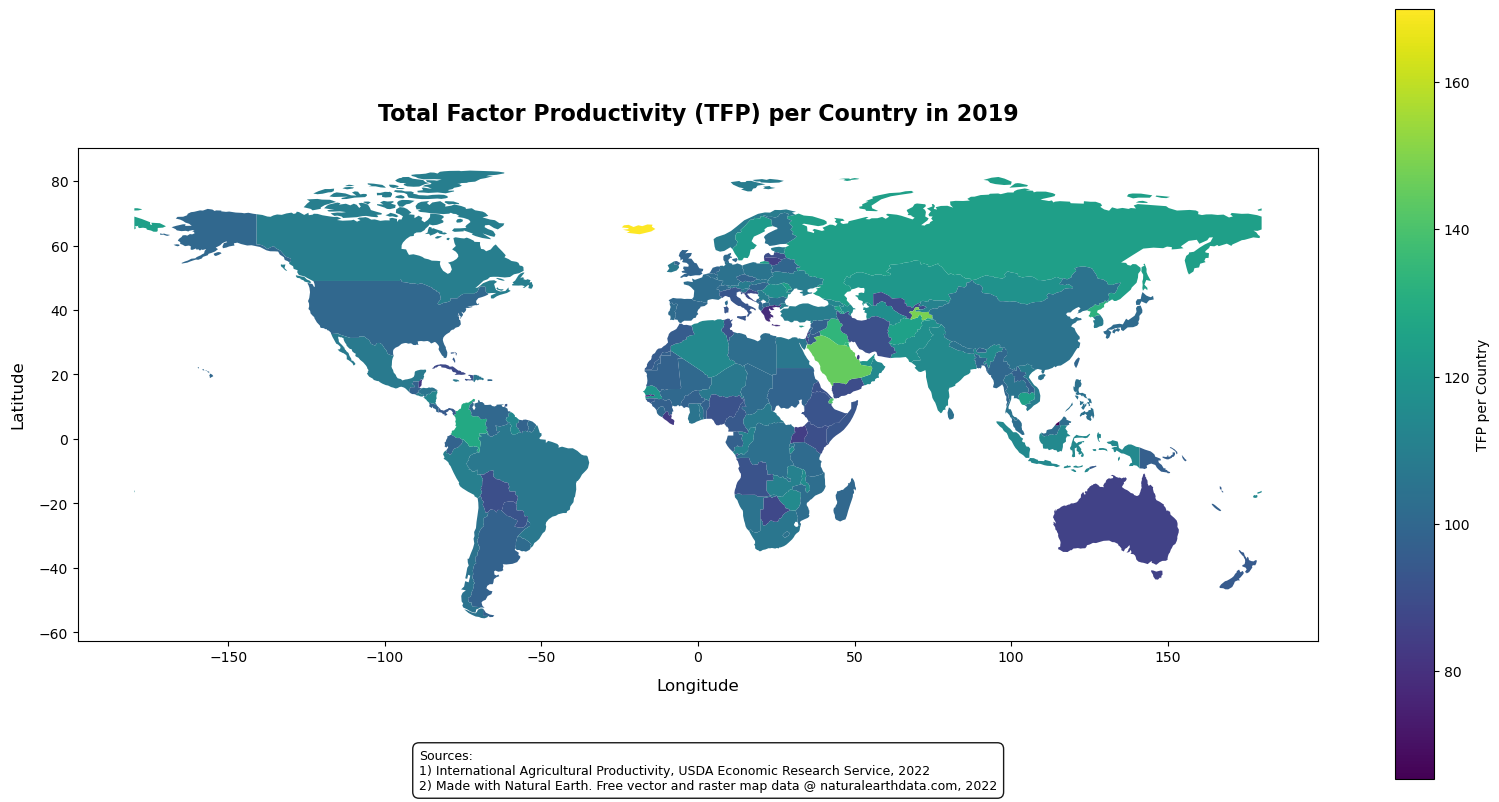

In [12]:
agros.choropleth(2019)

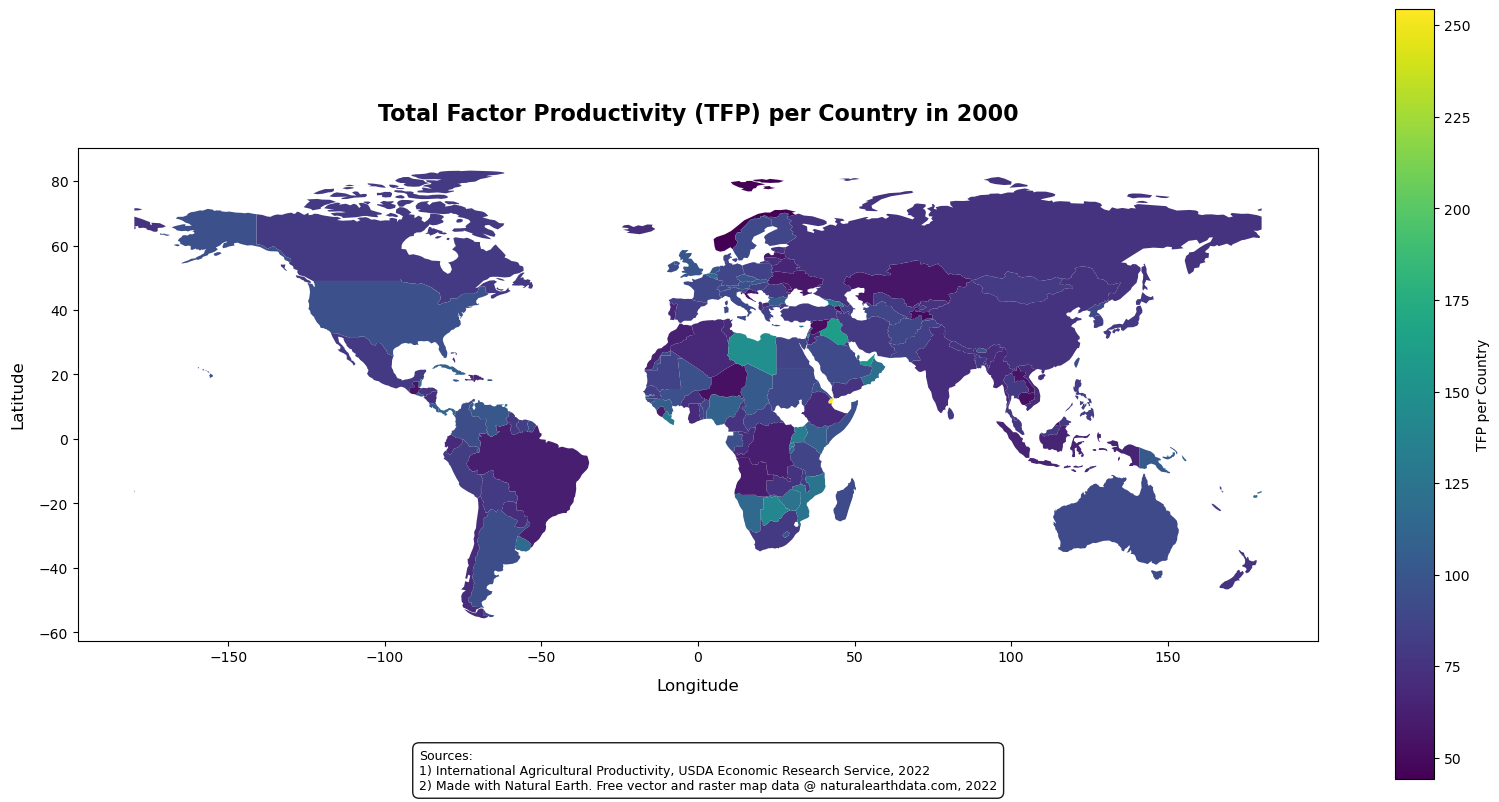

In [13]:
agros.choropleth(2000)

#### 3. Identification of key trends and changes over time

Comparing the two maps, it is evident that there have been significant changes in the distribution of TFP levels over time. In 2000, almost all countries were colored navy blue to dark blue, indicating low TFP levels, while in 2019, most countries were colored light blue and green-blue, indicating moderate TFP levels. Furthermore, the color scale for the 2000 map ranges from about 45 TFP to 255 TFP, while the 2019 map ranges from approximately 70 TFP to 170 TFP, showing that overall TFP levels have increased over time, with more countries moving towards moderate levels of TFP.

One key trend identified from the analysis is the increasing levels of TFP in several Asian countries. The 2019 map shows countries in Asia colored with lighter shades of blue, green, and green-yellow, indicating moderate TFP levels. This trend is consistent with the broader narrative of Asia's economic rise and increasing competitiveness in the global economy.

Another trend identified is the relative stagnation of TFP levels in North America, Europe, and Australia. These regions are primarily colored navy blue on both maps, indicating low TFP levels. While some countries such as Norway stand out in darker blue shades, indicating moderate TFP levels, overall, the maps suggest that these regions have not experienced significant improvements in TFP levels over time.

<hr style="border-top: 1px dashed #8c8b8b;">

### **E. ARIMA Prediction Analysis**

#### 1. Introduction to ARIMA prediction and its use in forecasting future trends

ARIMA (Autoregressive Integrated Moving Average) is a popular statistical method used for time-series analysis and forecasting. It involves modeling the underlying pattern and seasonality of a time series and using that model to make predictions about future values. ARIMA has been widely used in various fields, including agriculture, to forecast trends and predict future values of agricultural indicators.

In the context of the Agros project, ARIMA can be used to forecast future trends in agricultural productivity, crop yields, and other key indicators for different countries. By analyzing historical data and identifying patterns and trends, an ARIMA model can be used to make predictions about future values, which can help guide decision-making and policy development.

To implement this in the Agros project, a predictor method was developed that receives a list of countries as input and generates an ARIMA prediction for each country. The predictor method then plots the Total Factor Productivity (TFP) for each selected country and extends up to 2050, providing a long-term forecast of agricultural productivity for each country.

#### 2. ARIMA prediction analysis for the three selected countries

The ARIMA prediction chart for China, USA, and Germany shows the historical Total Factor Productivity (TFP) of these countries from 1961 to 2019 and predicts the TFP from 2020 to 2050. The chart provides valuable insights into the past and future trends of agricultural productivity in these countries.

The chart reveals that China had significantly lower TFP than Germany and the USA in the past, especially in the years 1960 to 1980. However, China experienced a rapid upswing in the 1980s, stagnated at around 50 TFP in the late 1980s, and had a continuous rapid upswing from the mid-1990s to 2019. By 2019, all three countries had a TFP of around 105.

Based on the ARIMA prediction, China is expected to overtake the USA and Germany in TFP in the next few years up to 2050 and continue its rapid upturn. The TFP of the USA and Germany will also continue to grow, but not to the same extent as that of China. The USA will remain just ahead of Germany in the coming years. Based on the ARIMA prediction, China is expected to have a TFP of about 150 in 2050, while the USA will have about 135 and Germany will be close behind at 130.

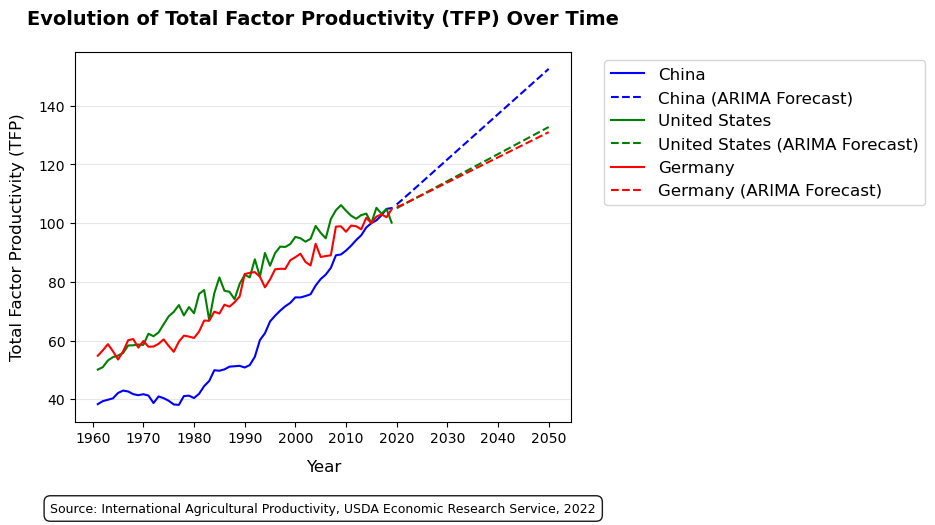

In [14]:
agros.predictor(["China", "United States", "Germany"])

#### 3. Interpretation of the results and identification of key insights

The historical TFP trends for China, USA, and Germany can be attributed to several factors such as government policies, technological advancements, investments, and macroeconomic conditions. China's rapid upswing in TFP in the 1980s can be attributed to the liberalization of the economy and the opening up of the market, which led to increased foreign investment and technological advancements. However, the stagnation in TFP in the late 1980s can be attributed to the limitations of the centrally planned economy. From the mid-1990s onwards, China has seen a continuous upswing in TFP due to increased investments in research and development, technological advancements, and market-oriented policies.

The USA's dominance in TFP from 1960 to 2019 can be attributed to its strong economic growth, technological advancements, and investments in research and development. Germany, on the other hand, has seen ups and downs in TFP, initially keeping pace with the USA in the 1960s but lagging behind in the 1970s due to the effects of the oil crisis. The reunification of Germany in the early 1990s led to a rapid upswing in TFP, but it lagged behind the USA again after the turn of the millennium due to the global economic slowdown.

The predictions made by the ARIMA model for China, USA, and Germany's TFP in the future are based on historical data and current trends. China's predicted increase in TFP can be attributed to its continued investments in research and development, technological advancements, and market-oriented policies. The predicted growth of TFP for the USA and Germany is relatively lower due to the slower rate of technological advancements, aging population, and less favorable macroeconomic conditions.

However, there are some limitations to the ARIMA prediction model. The model assumes that the future will follow the same pattern as the past, which may not be entirely accurate due to unforeseen events such as the COVID-19 crisis or trade wars. In addition, the model may not account for external factors such as political instability or economic shocks that could hinder the predicted growth in TFP for China, USA, and Germany.

<hr style="border-top: 1px dashed #8c8b8b;">

### **F. Summary and Conclusion**

#### 1. Recap of the key findings from each section

- In the Gapminder analysis, it was found that agricultural production has increased over time, but with significant differences across countries.

- In the comparison of three countries, it was observed that agricultural production varies greatly across countries and is influenced by various factors such as climate, geography, and government policies.

- Correlation analysis revealed strong positive correlations between variables such as agricultural TFP and total output, as well as between livestock and land use. The correlation analysis also showed that agricultural TFP is positively correlated with inputs such as fertilizers and labor, suggesting that investments in these areas can lead to increased efficiency in agricultural production.

- Choropleth analysis showed that there are regional variations in agricultural production, with some regions experiencing significant growth while others have stagnated or declined. Some regions, such as Asia, have experienced significant growth in agricultural production, while others, such as Africa, have lagged behind.

- ARIMA prediction analysis predicted future trends in agricultural production for the three selected countries. It suggests that agricultural production trends vary across countries, and are influenced by a complex interplay of factors. While the model may provide some insight into future trends, it is important to consider the limitations of the model and the potential for unforeseen events or changes in policy that could impact agricultural production in the future.

#### 2. Conclusion on the potential of data science in promoting sustainable agriculture

The Agros Project has demonstrated that data science can play a crucial role in driving the transition towards more sustainable and climate-friendly agricultural practices. By providing farmers, policymakers, and other stakeholders with valuable insights, data science can help improve the efficiency of farming practices, reduce waste and pollution, and mitigate the impact of climate change on crops and livestock. Furthermore, data science can help optimize the use of resources, such as water and fertilizers, and enable farmers to make more informed decisions.

In conclusion, the Agros Project provides a foundation for further exploration of data science techniques to improve the sustainability of agriculture. The key findings of the project highlight the significant differences in agricultural production across countries and the various factors that influence it, including climate, geography, and government policies. With global population growth and increasing demand for food, the agricultural sector faces significant challenges to meet this demand while reducing its environmental impact. The use of data science in agriculture has the potential to provide innovative solutions to these challenges and contribute to the achievement of sustainable agriculture by 2030, as set out by the United Nations.